In [ ]:
!pip install networkx

In [7]:
import networkx as nx
import pandas as pd 

G = nx.Graph()


In [8]:
trade = pd.read_csv("tradeFilteredExpanded.csv") 
trade.head()

#for idx, row in trade.iterrows():
#    print (row[0])
#    print (row[1])

nodearr = pd.unique(trade[['Country 1', 'Country 2']].values.ravel('K'))
for n in nodearr:
    G.add_node(n)

for idx, row in trade.iterrows():
    G.add_edge(row[0], row[1])
    

In [ ]:
print(list(G.nodes))
print(list(G.edges))

In [9]:
countries = nodearr
allshortestpaths = nx.shortest_path(G)

allshortestpathsdict = {}

for x in countries:
    countryshortestpathsdict = {}
    for y in countries:
        if x != y and y in allshortestpaths[x].keys():
            #print(x)
            #print(y)
            #print(allshortestpaths[x][y])
            countryshortestpathsdict[y] = allshortestpaths[x][y]
    allshortestpathsdict[x] = countryshortestpathsdict

allshortestpathsdict



{'Colombia': {'Singapore': ['Colombia', 'Australia', 'Singapore'],
  'Australia': ['Colombia', 'Australia'],
  'New Zealand': ['Colombia', 'New Zealand'],
  'Japan': ['Colombia', 'Japan'],
  'Philippines': ['Colombia', 'Australia', 'Philippines'],
  'United States': ['Colombia', 'United States'],
  'Canada': ['Colombia', 'Australia', 'Canada'],
  'Brazil': ['Colombia', 'Brazil'],
  'Mexico': ['Colombia', 'Mexico'],
  'India': ['Colombia', 'India']},
 'Singapore': {'Colombia': ['Singapore', 'Australia', 'Colombia'],
  'Australia': ['Singapore', 'Australia'],
  'New Zealand': ['Singapore', 'New Zealand'],
  'Japan': ['Singapore', 'Japan'],
  'Philippines': ['Singapore', 'Australia', 'Philippines'],
  'United States': ['Singapore', 'United States'],
  'Canada': ['Singapore', 'Australia', 'Canada'],
  'Brazil': ['Singapore', 'Brazil'],
  'Mexico': ['Singapore', 'Mexico'],
  'India': ['Singapore', 'India']},
 'Australia': {'Colombia': ['Australia', 'Colombia'],
  'Singapore': ['Australia', 

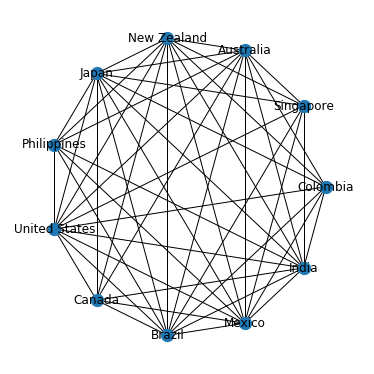

In [19]:
import matplotlib.pyplot as plt
#!pip install scipy
from scipy.optimize import minimize

nx.draw_circular(G, with_labels=True, font_size=12, node_size=150)

axes = plt.gca()
axes.set_xlim([-1.3, 1.3])
axes.set_ylim([-1.2, 1.2])
plt.axis('off')
plt.rcParams['figure.figsize'] = [5, 5]

#edge_labels = nx.draw_networkx_edge_labels(Gsmall, pos=nx.shell_layout(Gsmall, nlist=[['Brazil', 'Canada', 'Colombia', 'Costa Rica', 'Guatemala', 'Mexico', 'United States'], ['France', 'Germany', 'Hong Kong', 'India', 'Netherlands', 'Sweden', 'Turkey'], ["Australia", "Philippines", "Singapore", "Japan", "United Kingdom", "New Zealand"]]))

#nx.draw_networkx_edge_labels(Gsmall, edge_labels)
#plt.savefig("test.png") # save as png
plt.show()